# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
queryURL = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(queryURL + city).json()

In [4]:
# set up empty lists for needed characters
city_id = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
processingRecord = 0
setNumber = 1

#start processing record at 1
processingRecord = 1
setNumber = 1

print("Beginning Data Retrieval")
print("-------------------------")

# loop through each city
for city in cities:
    
#Exception handling
    try:
        response = requests.get(queryURL + city).json()
        city_id.append(response['id'])
        city_name.append(response['name']) 
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity']) 
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max']) 
        wind_speed.append(response['wind']['speed'])
        cityResponse = response['name']   
        if processingRecord > 49:
            processingRecord = 0
            setNumber +=1
    
        else:
            processingRecord +=1

        print(f"Processing Record {processingRecord} of set {setNumber} | {cityResponse}")
        
    except:
        print("city not found. Skipping ...")
    continue
    
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 2 of set 1 | Hobart
Processing Record 3 of set 1 | Berlevåg
Processing Record 4 of set 1 | Vaini
Processing Record 5 of set 1 | Faya
Processing Record 6 of set 1 | Ushuaia
Processing Record 7 of set 1 | Airai
Processing Record 8 of set 1 | Upernavik
city not found. Skipping ...
Processing Record 9 of set 1 | Sassandra
Processing Record 10 of set 1 | Kiryat Gat
Processing Record 11 of set 1 | Staryy Nadym
Processing Record 12 of set 1 | Yellowknife
Processing Record 13 of set 1 | Dikson
Processing Record 14 of set 1 | Tuktoyaktuk
Processing Record 15 of set 1 | Onega
Processing Record 16 of set 1 | Alice Springs
Processing Record 17 of set 1 | Mataura
Processing Record 18 of set 1 | Albany
Processing Record 19 of set 1 | Bafra
Processing Record 20 of set 1 | Jamestown
Processing Record 21 of set 1 | Torbay
city not found. Skipping ...
Processing Record 22 of set 1 | Punta Arenas
Processing Record 23 of set 1 | Castro
P

Processing Record 35 of set 4 | Lompoc
Processing Record 36 of set 4 | Burley
Processing Record 37 of set 4 | Pushkinskiye Gory
Processing Record 38 of set 4 | Nanortalik
Processing Record 39 of set 4 | Ossora
Processing Record 40 of set 4 | Puerto Limón
Processing Record 41 of set 4 | Yoichi
Processing Record 42 of set 4 | Faanui
Processing Record 43 of set 4 | Havre-St-Pierre
Processing Record 44 of set 4 | Jardim
Processing Record 45 of set 4 | Sitka
Processing Record 46 of set 4 | Kazachinskoye
Processing Record 47 of set 4 | Fortuna
Processing Record 48 of set 4 | Dejen
Processing Record 49 of set 4 | Saldanha
Processing Record 50 of set 4 | Saint-Rémy-de-Provence
Processing Record 0 of set 5 | Constitución
city not found. Skipping ...
Processing Record 1 of set 5 | Jumla
Processing Record 2 of set 5 | Muhos
city not found. Skipping ...
Processing Record 3 of set 5 | San Patricio
Processing Record 4 of set 5 | Kalcheva
Processing Record 5 of set 5 | Saint-Paul
Processing Record 6 

Processing Record 9 of set 8 | Porto-Novo
Processing Record 10 of set 8 | Newcastleton
Processing Record 11 of set 8 | Peace River
city not found. Skipping ...
Processing Record 12 of set 8 | San Borja
Processing Record 13 of set 8 | Dakar
Processing Record 14 of set 8 | Hamilton
Processing Record 15 of set 8 | Zhuhai
Processing Record 16 of set 8 | Vila Franca do Campo
city not found. Skipping ...
Processing Record 17 of set 8 | Nelson Bay
Processing Record 18 of set 8 | Mürzzuschlag
Processing Record 19 of set 8 | Shitanjing
Processing Record 20 of set 8 | Oriximiná
Processing Record 21 of set 8 | Bubaque
Processing Record 22 of set 8 | Terenos
Processing Record 23 of set 8 | Manokwari
Processing Record 24 of set 8 | Provideniya
Processing Record 25 of set 8 | Burns Lake
Processing Record 26 of set 8 | Tautira
Processing Record 27 of set 8 | Ouahigouya
Processing Record 28 of set 8 | Sulina
city not found. Skipping ...
Processing Record 29 of set 8 | Ust'-Koksa
Processing Record 30 o

city not found. Skipping ...
Processing Record 44 of set 11 | Ondjiva
Processing Record 45 of set 11 | Jalu
Processing Record 46 of set 11 | Goa
Processing Record 47 of set 11 | Kākināda
Processing Record 48 of set 11 | Khani
Processing Record 49 of set 11 | Gävle
Processing Record 50 of set 11 | Oksovskiy
Processing Record 0 of set 12 | Biak
Processing Record 1 of set 12 | Imeni Zhelyabova
Processing Record 2 of set 12 | Tomohon
Processing Record 3 of set 12 | Parrita
Processing Record 4 of set 12 | Ryōtsu-minato
Processing Record 5 of set 12 | Grasse
Processing Record 6 of set 12 | Lensk
Processing Record 7 of set 12 | Ayr
Processing Record 8 of set 12 | Beisfjord
Processing Record 9 of set 12 | Machalí
Processing Record 10 of set 12 | Kaabong
Processing Record 11 of set 12 | Daru
Processing Record 12 of set 12 | Vangaindrano
Processing Record 13 of set 12 | Takoradze
Processing Record 14 of set 12 | Jasper
Processing Record 15 of set 12 | Dhārchula
Processing Record 16 of set 12 | M

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weatherDict = {
    "City ID":city_id, 
    "City Name":city_name, 
    "Cloudiness":cloudiness,
    "Country":country, 
    "Date":date, 
    "Humidity":humidity,
    "Latitude":lat,
    "Longitude":lng, 
    "Max Temperature":max_temp,
    "Wind Speed":wind_speed
}
weatherDict = pd.DataFrame(weatherDict)
weatherDict.head()

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,2163355,Hobart,54,AU,1658862971,95,-42.8794,147.3294,44.46,3.44
1,780687,Berlevåg,100,NO,1658862836,88,70.8578,29.0864,62.60,2.30
2,4032243,Vaini,20,TO,1658863132,88,-21.2000,-175.2000,71.76,5.75
3,110690,Faya,100,SA,1658862891,57,18.3851,42.4509,69.91,4.52
4,3833367,Ushuaia,20,AR,1658863131,60,-54.8000,-68.3000,38.82,9.22


In [6]:
weatherDict.count()

City ID            576
City Name          576
Cloudiness         576
Country            576
Date               576
Humidity           576
Latitude           576
Longitude          576
Max Temperature    576
Wind Speed         576
dtype: int64

In [7]:
weatherDict.to_csv("output_data/weatherDict.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
maxHumid = weatherDict.loc[weatherDict['Humidity'] != 100]
maxHumid.describe()

,City ID,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
count,5.710000e+02,571.000000,5.710000e+02,571.000000,571.000000,571.000000,571.000000,571.000000
mean,2.658090e+06,53.915937,1.658863e+09,70.311734,20.057916,21.308689,70.497443,7.965464
std,1.609369e+06,40.965796,1.530250e+02,21.841555,32.991736,90.521047,14.064150,5.452758
min,5.700000e+04,0.000000,1.658863e+09,8.000000,-54.800000,-179.166700,33.310000,0.000000
25%,1.549127e+06,7.000000,1.658863e+09,59.000000,-7.695300,-56.856200,61.510000,3.815000
50%,2.167426e+06,60.000000,1.658863e+09,77.000000,24.800000,25.993100,72.270000,6.820000
75%,3.531470e+06,100.000000,1.658863e+09,87.000000,46.656700,106.308500,79.985000,10.895000
max,8.079926e+06,100.000000,1.658863e+09,99.000000,78.218600,179.316700,105.930000,30.270000


In [9]:
#  Get the indices of cities that have humidity over 100%.
maxHumid.count()

City ID            571
City Name          571
Cloudiness         571
Country            571
Date               571
Humidity           571
Latitude           571
Longitude          571
Max Temperature    571
Wind Speed         571
dtype: int64

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
maxHumid.head()

,City ID,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,2163355,Hobart,54,AU,1658862971,95,-42.8794,147.3294,44.46,3.44
1,780687,Berlevåg,100,NO,1658862836,88,70.8578,29.0864,62.60,2.30
2,4032243,Vaini,20,TO,1658863132,88,-21.2000,-175.2000,71.76,5.75
3,110690,Faya,100,SA,1658862891,57,18.3851,42.4509,69.91,4.52
4,3833367,Ushuaia,20,AR,1658863131,60,-54.8000,-68.3000,38.82,9.22


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

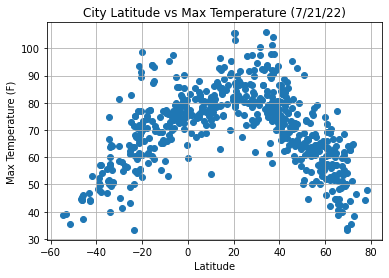

In [13]:
plt.scatter(maxHumid["Latitude"], maxHumid["Max Temperature"])
plt.title("City Latitude vs Max Temperature (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Images/temperature.png")
plt.show()

## Latitude vs. Humidity Plot

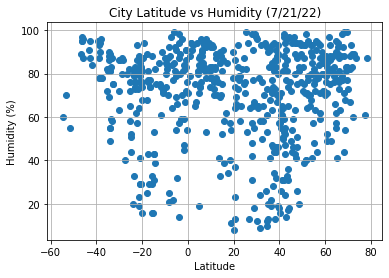

In [14]:
plt.scatter(maxHumid["Latitude"], maxHumid["Humidity"])
plt.title("City Latitude vs Humidity (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Images/humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

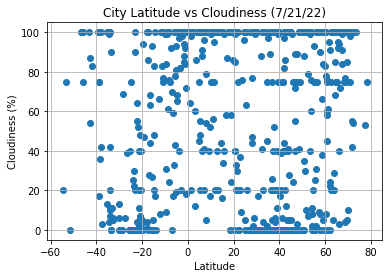

In [15]:
plt.scatter(maxHumid["Latitude"], maxHumid["Cloudiness"])
plt.title("City Latitude vs Cloudiness (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Images/cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

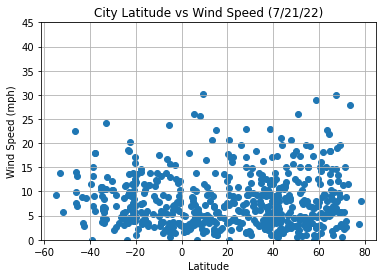

In [16]:
plt.scatter(maxHumid["Latitude"], maxHumid["Wind Speed"])
plt.title("City Latitude vs Wind Speed (7/21/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,45)
plt.grid()
plt.savefig("Images/wind_speed.png")
plt.show()

## Linear Regression

In [17]:
north = maxHumid['Latitude'] >= 0
northernHem = maxHumid[north]
southernHem = maxHumid[~north]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.42387698895816944


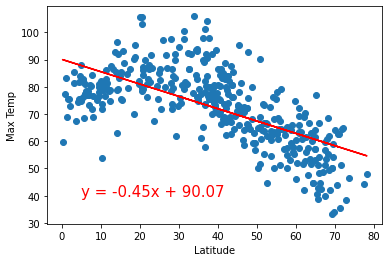

In [40]:
x_values = northernHem['Latitude']
y_values = northernHem['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(5,40),fontsize=15,color="red")
plt.savefig("Trendlines/north_temp_trend.png")
plt.show()


There is a negative correlation between the latitude and the maximum temperature in the northern hemisphere. The farther we are from the equator, the colder the temperature seems to get.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.5239943876975683


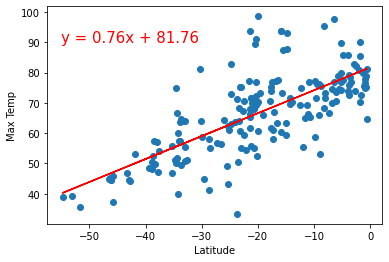

In [41]:
x_values = southernHem['Latitude']
y_values = southernHem['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.savefig("Trendlines/south_temp_trend.png")
plt.show()

There is a positive correlation between the latitude and the maximum temperature in the southern hemisphere. The closer we get to the equator, the warmer the temperature seems to get.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.0016000326044386534


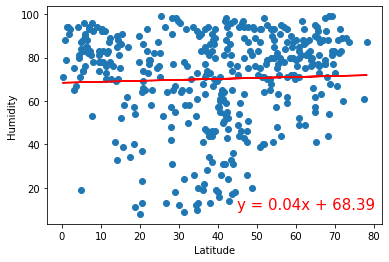

In [42]:
x_values = northernHem['Latitude']
y_values = northernHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.savefig("Trendlines/north_humid_trend.png")
plt.show()



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.02418185416500578


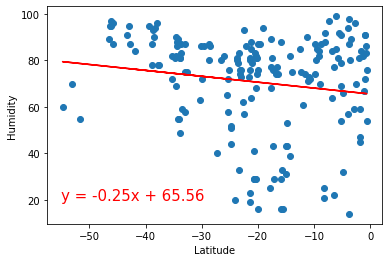

In [43]:
x_values = southernHem['Latitude']
y_values = southernHem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.savefig("Trendlines/south_humid_trend.png")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.0013408083747547138


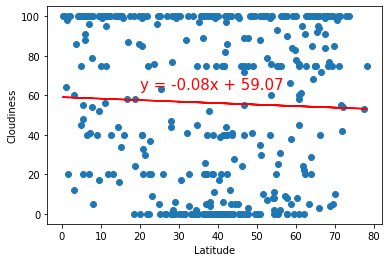

In [44]:
x_values = northernHem['Latitude']
y_values = northernHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(20,63),fontsize=15,color="red")
plt.savefig("Trendlines/north_cloud_trend.png")
plt.show()


There is no correlation between the latitude and the cloudiness % in the northern hemisphere. As the latitude goes farther from the equator, the cloudiness data goes in various directions with no direct focal point

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.03833047327298348


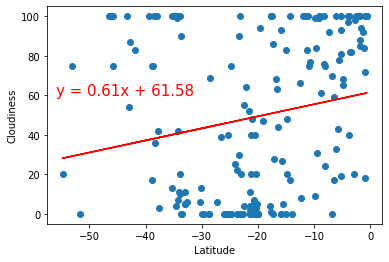

In [45]:
x_values = southernHem['Latitude']
y_values = southernHem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-56,60),fontsize=15,color="red")
plt.savefig("Trendlines/south_cloud_trend.png")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.00984499186982279


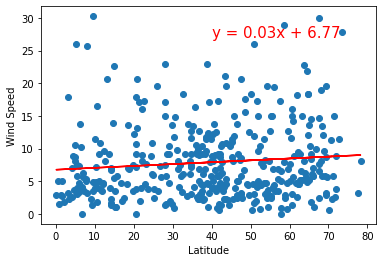

In [46]:
x_values = northernHem['Latitude']
y_values = northernHem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(40,27),fontsize=15,color="red")
plt.savefig("Trendlines/north_wind_trend.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.026152491408500667


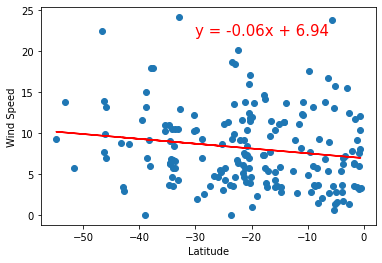

In [47]:
x_values = southernHem['Latitude']
y_values = southernHem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(-30,22),fontsize=15,color="red")
plt.savefig("Trendlines/south_wind_trend.png")
plt.show()